# Assignment 4: Constructing Confidence Interval

Once you are finished, ensure to complete the following steps.
1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.
2.  Fix any errors which result from this.
3.  Repeat steps 1. and 2. until your notebook runs without errors.
4.  Submit your completed notebook to OWL by the deadline.

## Global Toolbox

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as ss
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import t
import matplotlib.pyplot as plt
seed=106
np.random.seed(seed)

## Question 1 - <span style="color:green">[100]</span>
You are going to work on a dataset which lists certain attributes of the soccer players participated in the soccer world cup. We want to predict the players value and quantify the uncertainty of our prediction using what we learnt in week 4. The dataset has the following attributes:
- `Age`: Player age in years
- `Overall`: Player overall performance score (higher better)
- `Potential`: Player potential score (higher better)
- `Value`: Player value *i.e*, the amount of money in euros a club should pay in order to purchase the player (higher better)
- `Wage`: Player stipend in euros (higher better)
- `Preferred Foot`: Player preferred foot to play
- `International Reputation`: Player international fame (higher better)
- `Week Foot`: Performance score of player weak foot (higher better)
- `Skill Moves`: Player move skill score (higher better)
- `Body Type`: Player body type
- `Position`: Position player holds on the pitch
- `Height`: Player height in centimeters
- `Weight`: Player weight in kilograms

### Q 1.1 - <span style="color:red">[1]</span> - Load `data.csv` and show the first 5 rows. What is the target attribute?

In [2]:
# Load the data
df = pd.read_csv('A4_data.csv')

df.head()

,Age,Overall,Potential,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Body Type,Position,Height,Weight
0,27,87,88,91000000.0,115000.0,Right,4.0,4.0,3.0,Stocky,Reserve,189,82
1,27,86,87,78500000.0,190000.0,Right,3.0,3.0,4.0,Stocky,Middle,179,69
2,30,85,85,46500000.0,46000.0,Left,2.0,3.0,3.0,Stocky,Back,172,69
3,31,91,91,107500000.0,350000.0,Right,4.0,5.0,4.0,Stocky,Middle,181,70
4,25,86,89,89500000.0,110000.0,Right,3.0,3.0,3.0,Normal,Middle,172,68


*Answer*: The target attribute is "Value".

### Q 1.2 - <span style="color:red">[3]</span> - Use a pandas relevant method to reveal `Dtype` of the features and indicate whether the date set has any `Null` values. Also, do you see any categorical attributes? Name them please? 

In [3]:
#
print(df.dtypes)

if (df.isnull().any().any()):
    print('The dataset has Null values.')
else:
    print('The dataset does not have Null values')


Age                           int64
Overall                       int64
Potential                     int64
Value                       float64
Wage                        float64
Preferred Foot               object
International Reputation    float64
Weak Foot                   float64
Skill Moves                 float64
Body Type                    object
Position                     object
Height                        int64
Weight                        int64
dtype: object
The dataset does not have Null values


#### *Answer*: The categorical values are "Preferred Foot", "Body Type", and "Position".

There are no Null values.


### Q 1.3 - <span style="color:red">[3]</span> - Use a `pandas` relevant method to get a summary statistics of the data all in one tabular output and inspect it. Which features have the lowest and highest standard deviation respectively? What was the age of the youngest player in the World Cup? 

In [4]:
print(df.describe())

                Age       Overall     Potential         Value           Wage  \
count  17591.000000  17591.000000  17591.000000  1.759100e+04   17591.000000   
mean      23.109317     63.354954     70.973907  2.759077e+06    8244.784265   
std        4.623732      8.029464      6.523326  7.852143e+06   20502.356045   
min       15.000000     44.000000     47.000000  1.000000e+03     500.000000   
25%       20.000000     58.000000     67.000000  3.250000e+05     600.000000   
50%       22.000000     63.000000     71.000000  7.000000e+05    2000.000000   
75%       26.000000     69.000000     75.000000  1.800000e+06    6000.000000   
max       54.000000     91.000000     95.000000  1.905000e+08  450000.000000   

       International Reputation     Weak Foot   Skill Moves        Height  \
count              17591.000000  17591.000000  17591.000000  17591.000000   
mean                   1.103405      2.899324      2.300097    180.893639   
std                    0.400888      0.663286   

#### *Answer*: "International Reputation" and "Value" have the lowest and highest standard deviations, respectively.

The minimum age is 15.




### Q 1.4 - <span style="color:red">[4]</span> - Use a `pandas` relevant method to see the distribution of the numerical features all in one plot window. Which ones look like Gaussian?

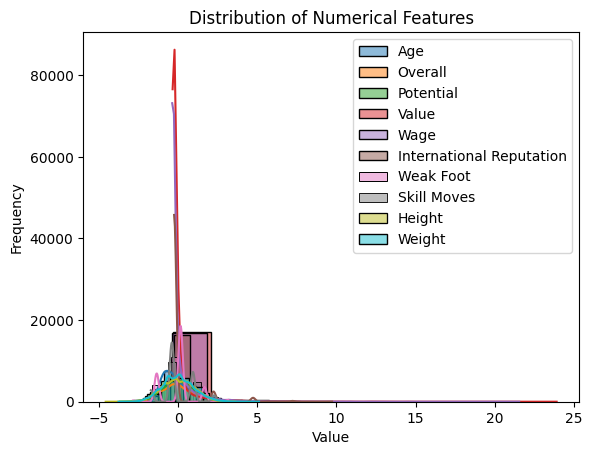

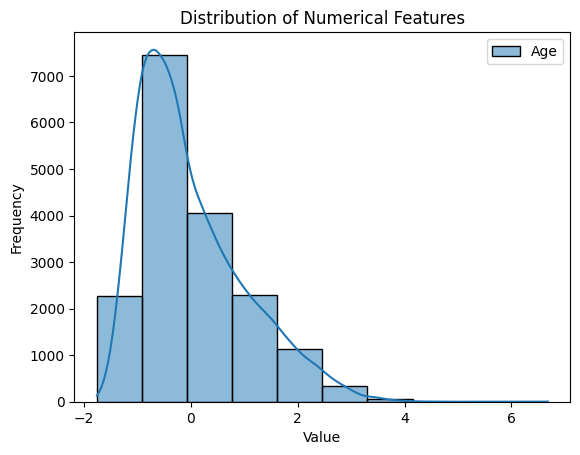

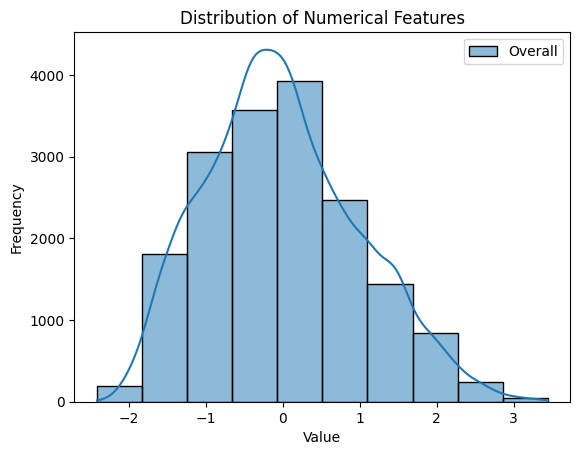

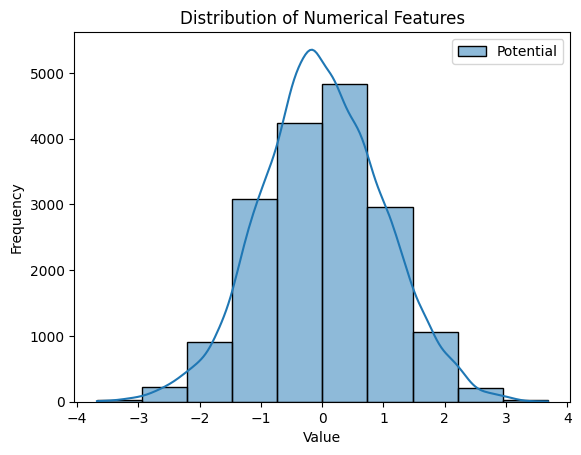

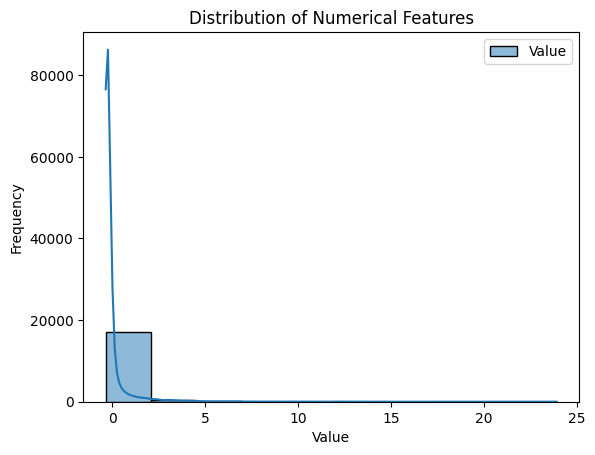

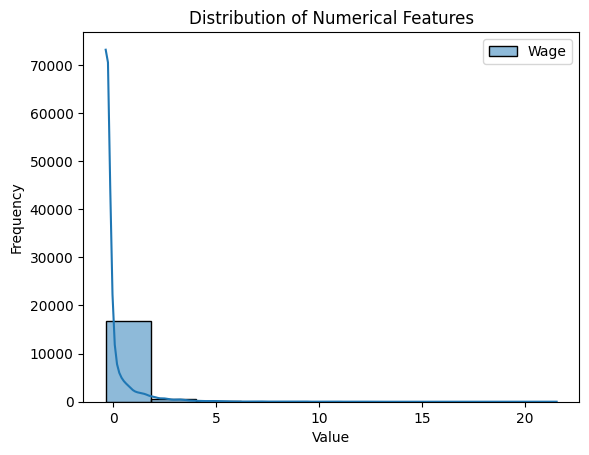

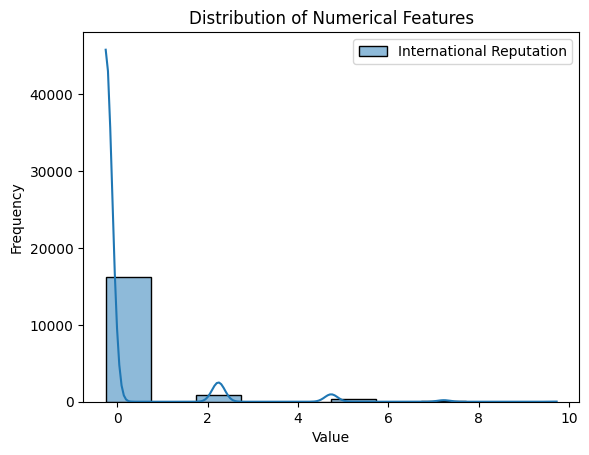

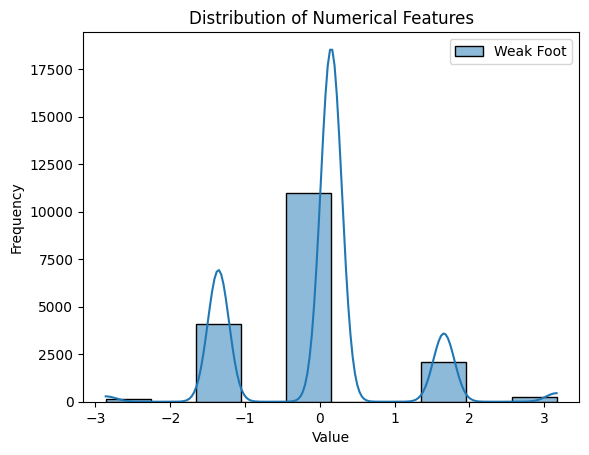

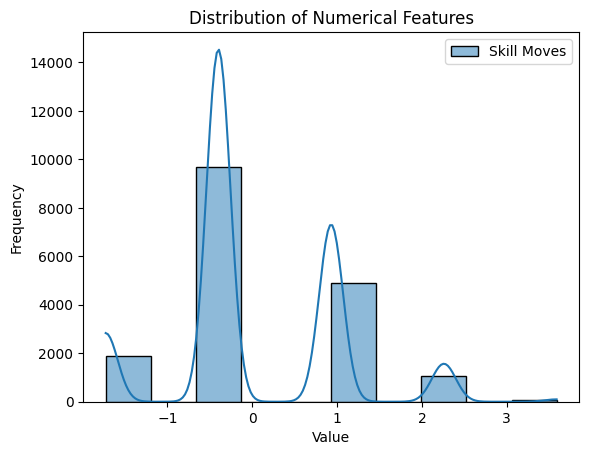

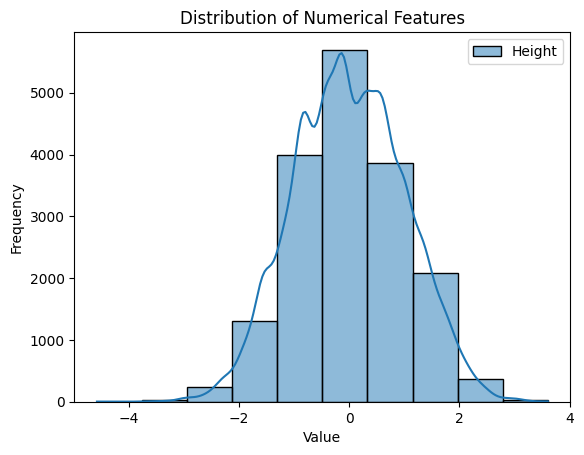

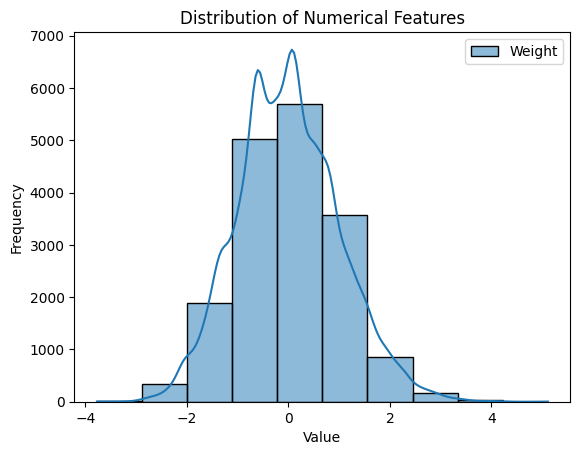

In [5]:
from sklearn.preprocessing import StandardScaler

df_numeric = df.select_dtypes(include=[int, float])

df_normalized = StandardScaler().fit_transform(df_numeric)
df_normalized = pd.DataFrame(df_normalized, columns=df_numeric.columns)

for column in df_normalized:
    sns.histplot(df_normalized[column], kde=True, label=column,bins=10)

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Numerical Features')
plt.show()

for column in df_normalized:
    sns.histplot(df_normalized[column], kde=True, label=column, bins=10)

    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.legend()
    plt.title('Distribution of Numerical Features')
    plt.show()

#### *Answer*: Overall, Potential, Height, and Weight appear to be Gaussian.

### Q 1.5 - <span style="color:red">[2]</span> - Perform one hot encoding on the dataframe to prepare the categorical values for linear regression.

This can be done in different ways, two common methods are [this](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) and [this](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html).

Note that, in one hot encoding, a categorical attribute with $n$ distinct entries gets replaced with $n-1$ columns with entries of 0 or 1.

In [6]:
df_one_hot = pd.get_dummies(df, columns=['Preferred Foot', 'Body Type', 'Position'])

df_one_hot.head()

,Age,Overall,Potential,Value,Wage,International Reputation,Weak Foot,Skill Moves,Height,Weight,Preferred Foot_Left,Preferred Foot_Right,Body Type_Lean,Body Type_Normal,Body Type_Stocky,Position_Back,Position_Forward,Position_Middle,Position_Reserve
0,27,87,88,91000000.0,115000.0,4.0,4.0,3.0,189,82,False,True,False,False,True,False,False,False,True
1,27,86,87,78500000.0,190000.0,3.0,3.0,4.0,179,69,False,True,False,False,True,False,False,True,False
2,30,85,85,46500000.0,46000.0,2.0,3.0,3.0,172,69,True,False,False,False,True,True,False,False,False
3,31,91,91,107500000.0,350000.0,4.0,5.0,4.0,181,70,False,True,False,False,True,False,False,True,False
4,25,86,89,89500000.0,110000.0,3.0,3.0,3.0,172,68,False,True,False,True,False,False,False,True,False


### Q 1.6 - <span style="color:red">[4]</span> - Use `seaborn.jointplot` to plot marginal histograms to investigate the relationship between `Overall` and `Value` as well as `Wage` and `Value`.

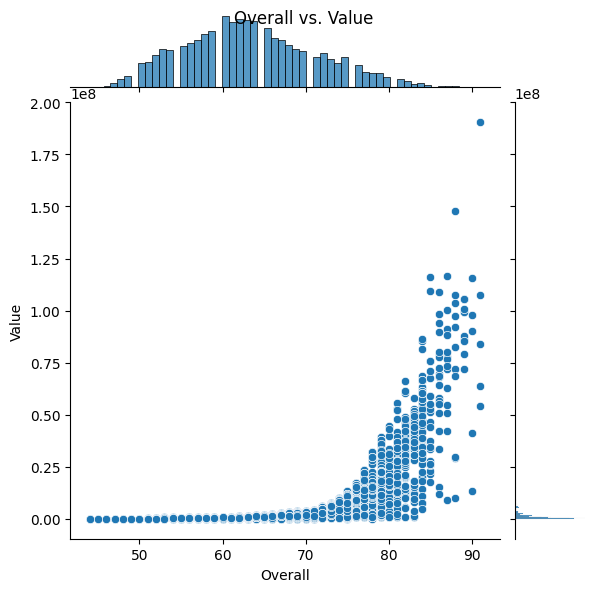

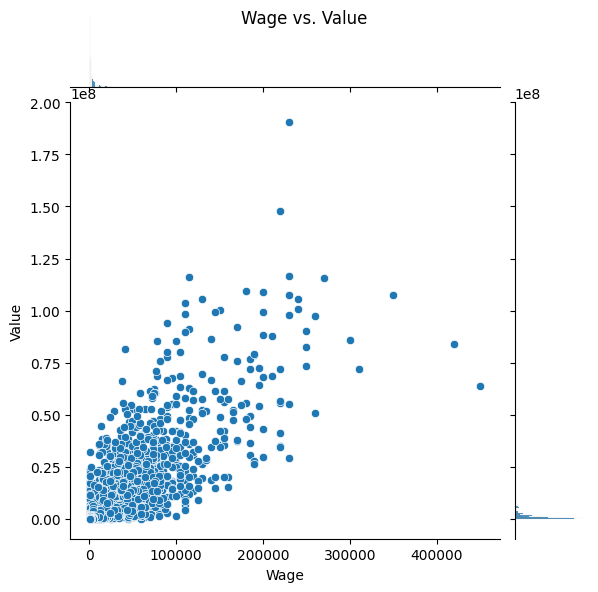

In [7]:
overall_value = sns.jointplot(data=df, x='Overall', y='Value')
wage_value = sns.jointplot(data=df, x='Wage', y='Value')

overall_value.fig.suptitle('Overall vs. Value')
wage_value.fig.suptitle('Wage vs. Value')
plt.show()


### Q 1.7 - <span style="color:red">[12]</span> - Determine which one(s) of the attributes `Overall`, `Wage`, and `Value` should be $log$ transformed and apply the transformation. Now, repeat what you did in "Q 1.6" but this time use the transformed version of the attribute(s) where applicable. Make sure to concatenate your original dataframe with the transformed versions of the attributes using different names to avoid overwriting the original attributes.


Hint: For example, you can see that "Value" is highly skewed to the right, therefore, you need to use the transformation for it.

Hint: $log$ transform is often used to normalize skewed distributions.

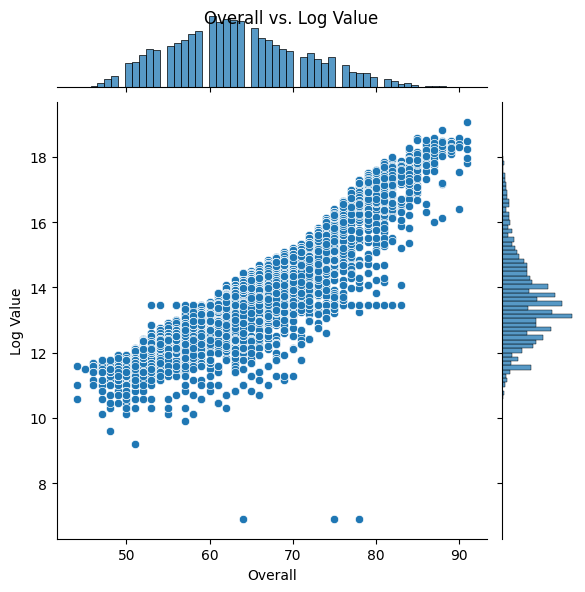

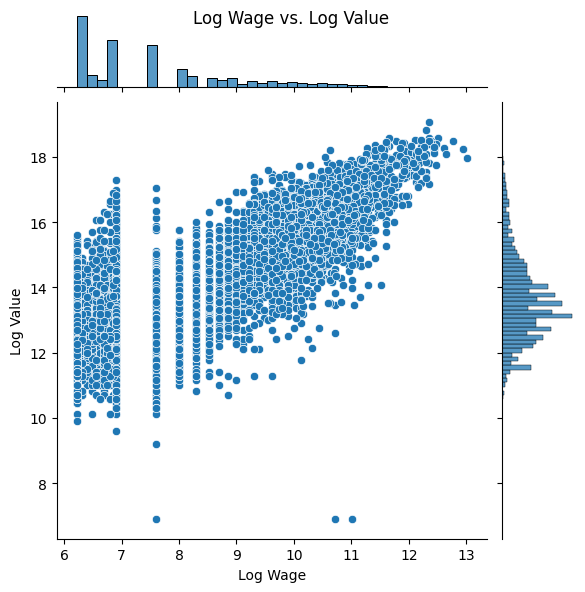

In [8]:
df_one_hot['Log Value'] = np.log1p(df_one_hot['Value'])
df_one_hot['Log Wage'] = np.log1p(df_one_hot['Wage'])

overall_value = sns.jointplot(data=df_one_hot, x='Overall', y='Log Value')
wage_value = sns.jointplot(data=df_one_hot, x='Log Wage', y='Log Value')

overall_value.fig.suptitle('Overall vs. Log Value')
wage_value.fig.suptitle('Log Wage vs. Log Value')
plt.show()


### Q 1.8 - <span style="color:red">[4]</span> - Use `pandas.corr()` to output

a) the pairwise correlations between every attribute and the original target (*i.e.*, before transformation), and

b) the pairwise correlations between every attribute and the $log$-transformed target.

For each part, the output of your code should be a table with two columns, one listing the attributes excluding the target (or transformed target), and the other column being correlation values in an ascending order.

Once you have the tables, use the mean of the absolute values of the correlations (per table) as a basis to judge whether it is best to use "LogValue" or "Value" as target.

In [9]:
# part a)

corrs = df_one_hot.corr()['Value'].drop(['Value', 'Log Value']).sort_values(ascending=True)
corr_abs_mean = np.mean(np.abs(corrs))

print(corrs)

# part b)
log_corrs = df_one_hot.corr()['Log Value'].drop(['Value', 'Log Value']).sort_values(ascending=True)
log_corrs_abs_mean = np.mean(np.abs(log_corrs))

print(log_corrs)

print(f'Value correlations (abs) mean: {corr_abs_mean}')
print(f'Log Value correlations (abs) mean: {log_corrs_abs_mean}')



Position_Reserve           -0.248424
Body Type_Normal           -0.058364
Body Type_Lean             -0.032864
Preferred Foot_Right       -0.023495
Preferred Foot_Left         0.023495
Height                      0.032431
Weight                      0.059704
Position_Forward            0.107982
Position_Back               0.139002
Position_Middle             0.139749
Age                         0.170291
Weak Foot                   0.174253
Body Type_Stocky            0.201878
Skill Moves                 0.288468
Potential                   0.513512
International Reputation    0.541435
Log Wage                    0.554650
Overall                     0.567571
Wage                        0.810439
Name: Value, dtype: float64
Position_Reserve           -0.395012
Preferred Foot_Right       -0.066396
Body Type_Lean             -0.040339
Body Type_Normal           -0.022794
Height                      0.026671
Preferred Foot_Left         0.066396
Weight                      0.082446
Body Type_

#### *Answer* There is higher correlation with the log values: it would be best to use that as a target.


### Q 1.9 - <span style="color:red">[4]</span> - What were the most positively and negatively correlated features in each table in Q 1.8? How do you interpret the positive and negative correlations?

#### *Answer* 

The most negatively correlated feature was "Position Reserve" and the most positive was "Wage' for the non-transformed 'Value'. Excluding one-hot encoded categorical variables, there would be no negative correlations. The positive correlation means that an increase in wage corresponds to an increase in value, while the negative correlation means an "increase" in Position Reserve corresponds to a decrease in value (although in this case, an "increase" in Position Reserve does not signify much, since it is a one-hot encoded categorical variable).

This is similar for the transformed "Log Value", except the most highly correlated is "Overall".

### Q 1.10 - <span style="color:red">[15]</span> - Let's train a model to predict the target (*i.e.*, concluded in your answer to Q 1.8):
1. Use `mean_squared_error` to calculate Root Mean Squared Error (RMSE) as your model scorer
2. Split the data into train and test with `test_size=0.2, random_state=seed`
3. Pick `LinearRegression()` from sklearn as your model
4. Report both prediction (*i.e.*, on training set) and generalization (*i.e.*, on test set) RMSE scores of your model

In [10]:
X = df_one_hot.drop(columns=['Value', 'Log Value'])
y = df_one_hot['Log Value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))

y_pred_test = model.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print(f'Prediction RMSE: {rmse_train}')
print(f'Generalization RMSE: {rmse_test}')

Prediction RMSE: 0.2981150073710558
Generalization RMSE: 0.29334971315894026


### Q 1.11 - <span style="color:red">[8]</span> - Scatter plot `Overall` vs true `LogValue` as well as `Overall` vs predicted `LogValue` in the same graph window over the test set. 

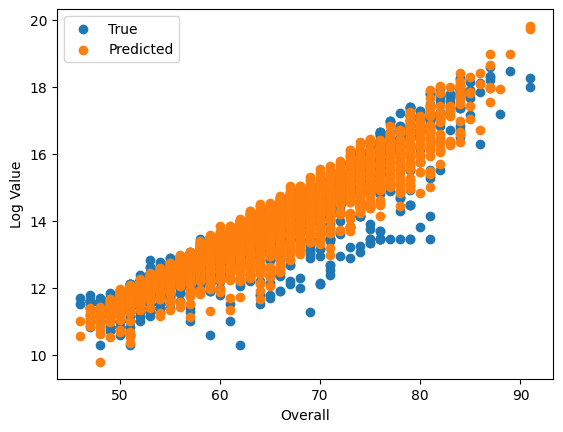

In [11]:
test_df = pd.concat([X_test, y_test])

plt.scatter(X_test['Overall'], y_test, label='True')
plt.scatter(X_test['Overall'], y_pred_test, label='Predicted')
plt.legend()
plt.xlabel('Overall')
plt.ylabel('Log Value')
plt.show()

### Q 1.12 - <span style="color:red">[15]</span> - Calculate confidence interval (based on 99% confidence level) for the mean of target by bootstrapping. For this purpose, code a bootstrap function that in each bootstrap iteration, samples from the training set to fit the linear regression model and uses the test set to make predictions - therefore your bootstrap statistic is the average of the predictions over the test set. Your function must take as input arguments: your model, Xtrain, ytrain, Xtest, and numboot=100. The function must return only one object that is the array of recorded values for the bootstrap statistic in $\mathrm{euros}$ - and not $log(\mathrm{euros})$. Also, the unit of the confidence interval must be $\mathrm{euros}$ - and not $log(\mathrm{euros})$.

In [12]:
def bootstrap(model, X_train, y_train, X_test, numboot=100):
    bootstrap_stats = []

    for _ in range(numboot):
        sample_indices = np.random.choice(X_train.shape[0], X_train.shape[0], replace=True)
        X_boot = X_train.iloc[sample_indices]
        y_boot = y_train.iloc[sample_indices]

        model.fit(X_boot, y_boot)

        y_pred = model.predict(X_test)

        bootstrap_stat = np.mean(y_pred)
        bootstrap_stats.append(bootstrap_stat)

    return bootstrap_stats

bootstrap_results = bootstrap(model, X_train, y_train, X_test, numboot=100)
ci_99 = np.percentile(bootstrap_results, [0.5, 99.5])
print("99% CI (eurors):", ci_99)


99% CI (eurors): [13.63018885 13.64258719]


### Q 1.13 - <span style="color:red">[6]</span> - Construct a 99% confidence interval using the Central Limit Theorem (again in $\mathrm{euros}$). 

In [13]:
def clt_ci(data):
    mu = np.mean(data)
    sigma = np.std(data, ddof=1)
    alpha = 1 - 0.99
    z = abs(np.percentile(np.random.randn(10000), alpha / 2))

    std_err = sigma / (np.sqrt(len(data)))
    ci = (mu - z * std_err, mu + z * std_err)

    return ci

print("99% Confidence Interval (in euros):", clt_ci(y_pred_test))

99% Confidence Interval (in euros): (13.560170664557159, 13.71232102536558)


### Q 1.14 - <span style="color:red">[10]</span> - We want to see the effect of sample size ($n$) on the CI calculated from CLT. Write a `for` loop which in each iteration randomly samples from your "sample statistic" and calculates and stores the width of the corresponding CI in an array. Obviously, you should start from a small $n$ and increase it per iteration. After the loop, plot sample size (*i.e.*, $n$) against CI width and report your observation in one sentence.

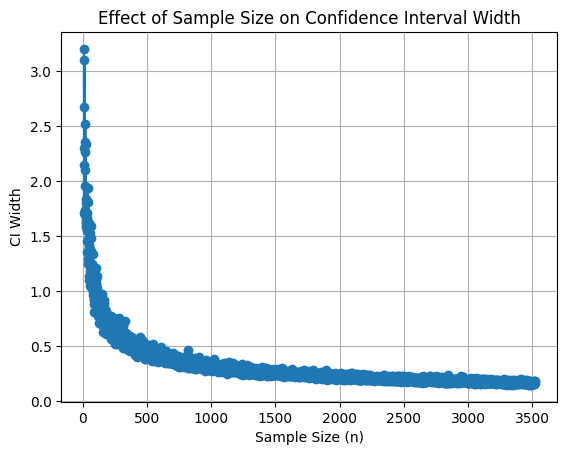

In [14]:
sample_sizes = []
ci_widths = []

def clt_ci_sampling(data, n):
    sample = np.random.choice(data, size=n, replace=False)
    ci = clt_ci(sample)
    ci_width = ci[1] - ci[0]
    return (n, ci_width)


for n in range(10, len(y_pred_test) + 1):
    sample_size, ci_width = clt_ci_sampling(y_pred_test, n)
    sample_sizes.append(sample_size)
    ci_widths.append(ci_width)

# Plot sample size (n) against CI width
plt.plot(sample_sizes, ci_widths, marker='o')
plt.xlabel('Sample Size (n)')
plt.ylabel('CI Width')
plt.title('Effect of Sample Size on Confidence Interval Width')
plt.grid(True)
plt.show()


#### *Answer* As the sample size increases, we observe an exponential decrease in the confidence interval width. That is, our confidence interval grows exponentially more precise as the sample size increases.

### Q 1.15 - <span style="color:red">[9]</span> - Randomly subsample your "sample statistic" with $n=30$ and calculate $t$-based 99% CI (in $\mathrm{euros}$). Is it a good idea to calculate CI for this data set this way? Why?

Hint: It would be a good idea to run your code for this part a few times prior to answering the question.

In [15]:
import scipy.stats as stats

def t_ci(data, n):
    sample = np.random.choice(data, size=n, replace=False)
    mu = np.mean(sample)
    sigma = np.std(sample, ddof=1)
    alpha = 1 - 0.99
    t = stats.t.ppf(1 - alpha / 2, df=n-1)
    std_err = sigma / np.sqrt(n)
    ci = (mu - t * std_err, mu + t * std_err)
    return ci

for _ in range(5):
    print(t_ci(y_pred_test, 30))

(12.891993958305896, 13.830992304145841)
(12.814594017329622, 13.851163566194483)
(13.072312210882734, 14.448970589213646)
(13.441061757881252, 14.903386010184304)
(13.004441969605827, 14.075726101371172)


#### *Answer* Although it is technically valid to use t-based CIs, it is not necessary since we have enough samples (~4000 >>> 30) that the CLT applies and we can use z-intervals. Using the t-based CIs wth n=30 introduces more variance in the CIs than necessary, as observed above.